# Métodos de Monte Carlo

## Diferencia entre MC y simulación

Una simulación es una representación aproximada de un sistema o proceso del mundo real, mientras que el método de Monte Carlo es una técnica estadística para obtener resultados aproximados usando muestreo aleatorio.

- **Simulación**: En una simulación, intentamos modelar un sistema o proceso del mundo real en un entorno controlado (como una computadora) para estudiar su comportamiento y hacer predicciones. La simulación puede usar diferentes métodos, no sólo el muestreo aleatorio, y puede involucrar una amplia gama de disciplinas, desde la física hasta la economía.

- **Método de Monte Carlo**: Esta es una técnica específica dentro de la estadística y las matemáticas aplicadas donde se utilizan números aleatorios o muestreo aleatorio para resolver problemas que podrían ser determinísticos en principio. El método de Monte Carlo a menudo se usa como un componente dentro de una simulación más grande para resolver partes específicas del modelo que son difíciles de analizar de forma exacta.


- Estimación del valor de Pi usando puntos aleatorios dentro de un círculo y un cuadrado.
- Simulación de juegos de azar como el póker para determinar las probabilidades.
- Valoración de opciones financieras.
- Estimación de integrales difíciles de resolver analíticamente.
- Cálculo de la probabilidad de eventos raros, como fallas catastróficas en ingeniería.
- Aprendizaje por refuerzo

In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Inicialización
n_simulations = [100, 1000, 5000, 10000]
pi_estimates = []
fig = make_subplots(rows=2, cols=2, subplot_titles=("100 Simulaciones", "1000 Simulaciones", "5000 Simulaciones", "10000 Simulaciones"))

# Función para estimar Pi
def estimate_pi(n):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside_circle) / n
    return x, y, inside_circle, pi_estimate

# Gráfica de convergencia
convergence_x = []
convergence_y = []
for n in range(10, 10001, 10):
    _, _, _, pi_estimate = estimate_pi(n)
    convergence_x.append(n)
    convergence_y.append(pi_estimate)

# Subgráficas para diferentes número de simulaciones
for i, n in enumerate(n_simulations):
    x, y, inside_circle, pi_estimate = estimate_pi(n)
    pi_estimates.append(pi_estimate)
    row = 1 if i < 2 else 2
    col = 1 if i % 2 == 0 else 2
    fig.add_trace(go.Scatter(x=x[inside_circle], y=y[inside_circle], mode='markers', marker=dict(color='blue', size=5)), row=row, col=col)
    fig.add_trace(go.Scatter(x=x[~inside_circle], y=y[~inside_circle], mode='markers', marker=dict(color='red', size=5)), row=row, col=col)

# Finalización
fig_convergence = go.Figure(data=[go.Scatter(x=convergence_x, y=convergence_y)])
fig_convergence.update_layout(title="Convergencia a Pi",
                              xaxis_title="Número de Simulaciones",
                              yaxis_title="Estimación de Pi")
fig_convergence.show()

fig.update_layout(height=800, width=800, title="Estimación de Pi usando Monte Carlo")
fig.show()

print("Estimaciones de Pi:", pi_estimates)


Estimaciones de Pi: [3.2, 3.236, 3.1208, 3.1528]


## Ventajas y desventajas de MCMC

- Velocidad
- Generalizabilidad
- Sencillez

# Monte Carlo Markov Chain (MCMC)

A lo largo de esta práctica pensaremos que estamos diseñando un juego de mesa en el que tenemos la siguiente configuración de posiciones en el tablero. 

<div style='text-align: center;'>
<img src='./tablero.png' width='700'/>
</div>

El jugador comienza en una de estas posiciones de manera aleatoria con una distribución $$ \pi_0=(\pi_0^{\text{verde}},\pi_0^{\text{amarillo}},\pi_0^{\text{rojo}},\pi_0^{\text{azul}}), \\ \sum \pi_0=1. $$

Cada turno consiste en lo siguiente:
- El jugador recibe una recompensa o un castigo que depende de su posición y está dado por la función $$  R: \text{color} \implies \mathbb{R} $$
- Después el jugador se mueve a una de las 4 posiciones del tablero con una probabilidad dada por la función de transición $$\mathbb{P}\left[ X_n=j|X_{n-1}=i \right]=M_{ij}$$

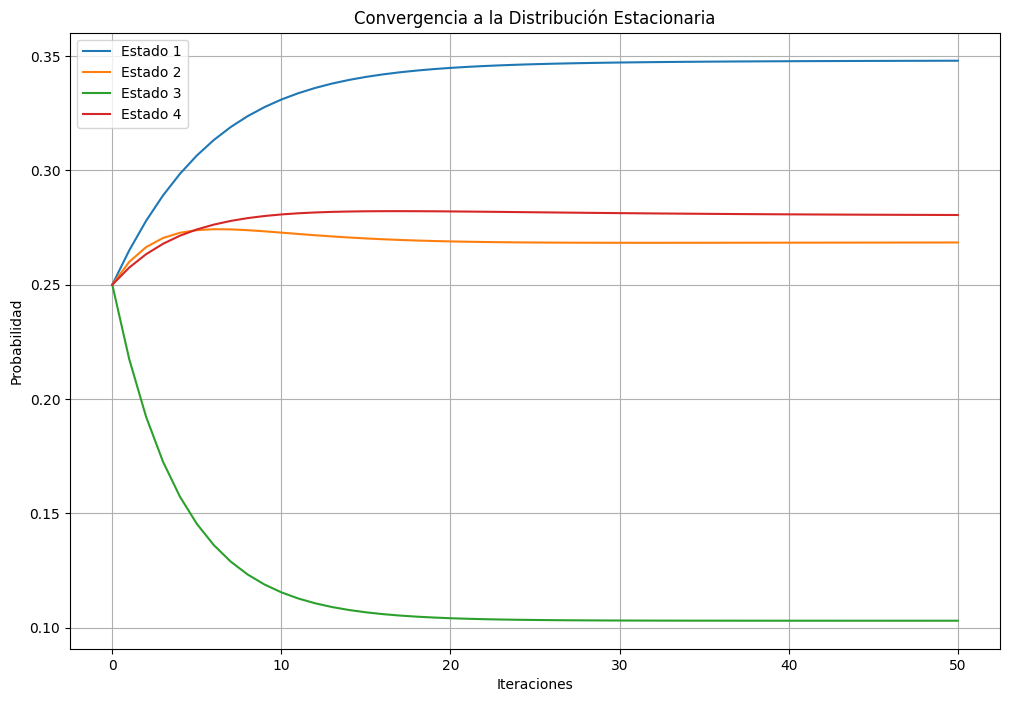

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz de transición (4x4)
transition_matrix = np.array([
    [0.9, 0.07, 0.02, 0.01],
    [0.1, 0.85, 0.03, 0.02],
    [0.05, 0.1, 0.8, 0.05],
    [0.01, 0.02, 0.02, 0.95]
])

# Distribución inicial (4 estados)
initial_distribution = np.array([0.25, 0.25, 0.25, 0.25])

# Listas para guardar la evolución de la distribución y la iteración
distributions = [initial_distribution]
iterations = 50

# Iterar para calcular la distribución en cada paso
for i in range(iterations):
    new_distribution = np.dot(distributions[-1], transition_matrix)
    distributions.append(new_distribution)

# Convertir a un array de NumPy para facilitar el acceso
distributions = np.array(distributions)

# Crear la visualización
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.plot(range(iterations + 1), distributions[:, i], label=f"Estado {i+1}")

plt.title("Convergencia a la Distribución Estacionaria")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()


# ¿Porqué sé que converge?

Es una cadena irreducible y finita, entonces es una cadena positiva recurrente. Entonces tiene una distribución estacionaria única. 

Dados ciertos premios. Cuál será el valor esperado en n-pasos?
Si la cadena es suficientemente grande. Cada paso va a tener una ganancia esperada de $$ \mathbb{E}\left[ R(X) \right]=R(\text{verde}) \pi(\text{verde})+R(\text{azul}) \pi(\text{azul}) +R(\text{amarillo}) \pi(\text{amarillo})+R(\text{rojo}) \pi(\text{rojo})$$


In [5]:
R_x=np.array([1,2,-50,3])

E_Rx= R_x@distributions[-1,:]
E_Rx

-3.429242461861829

# ¿Cómo harían el juego justo dada esta distribución?



Ahora tengo que tomar una distribución estacionaria y construir la matriz de transición